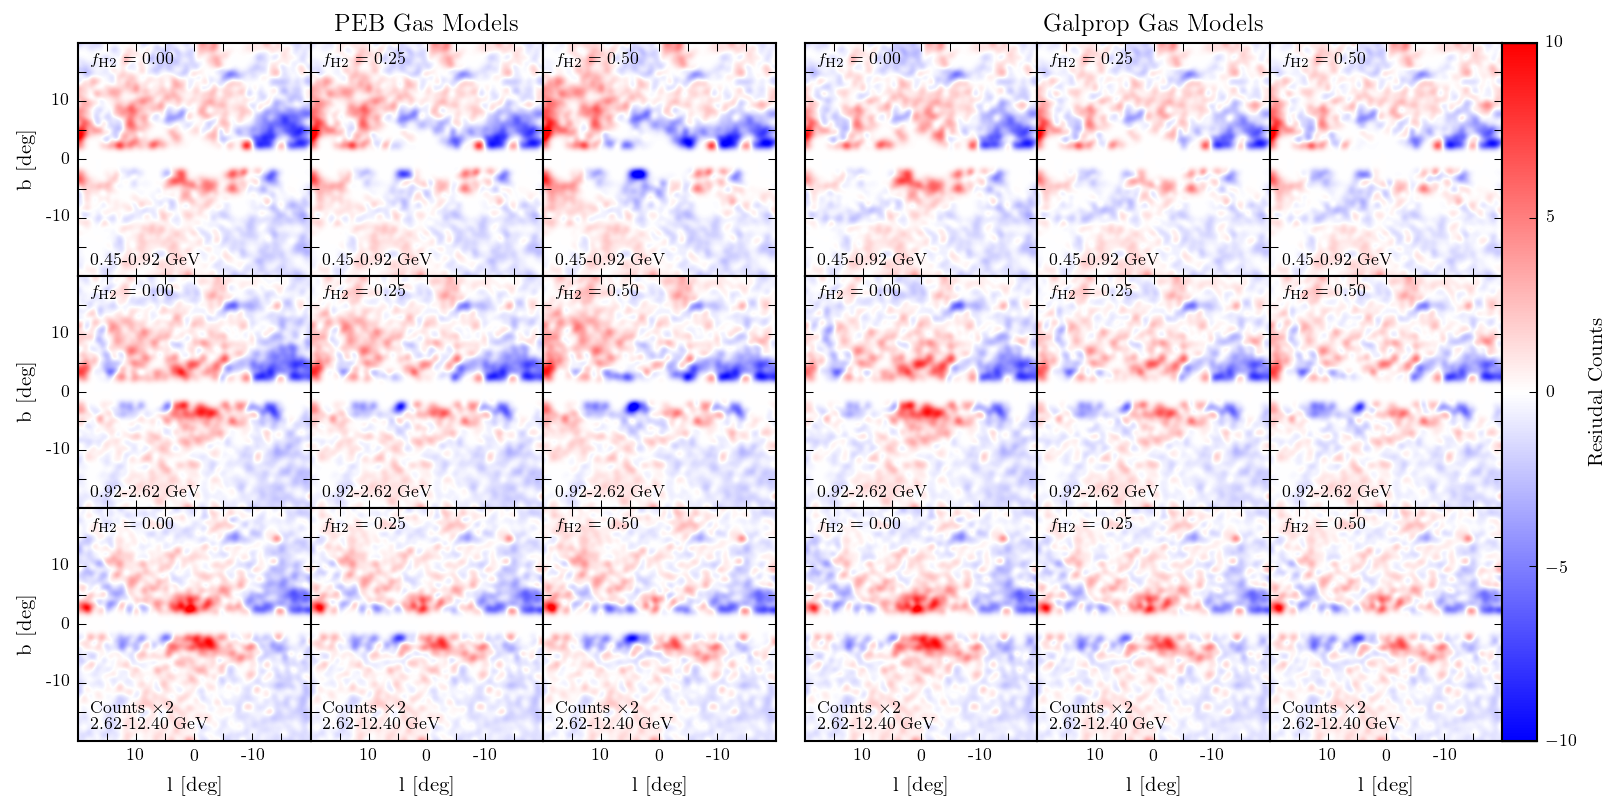

In [23]:
import h5py
import healpy
import sys
sys.path.append('../')
import Analysis
from scipy import ndimage

A = Analysis.Analysis() 
mask = A.GenSquareMask(l_range=[-20,20], b_range=[-20,20], plane_mask=2)
psc_weights = A.CalculatePixelWeights(diffuse_model='../fermi_diffuse_'+A.tag+'.npy',psc_model='../PSC_3FGL_with_ext.npy',alpha_psc=5., f_psc=0.1)

def PlotResiduals(model, energy_range, text, grid):
    # Open the file and load the fit results of interest.
    h = h5py.File('../mod_c/mod_k_%i_XCO_stripped.hdf5'%model)
    residual = h['/fit_results/GC_no_dm/residual'][...]
    E = h['/fit_results/GC_no_dm'].attrs['energies']
    
    
    E_bin_1, E_bin_2 = np.argmin(np.abs(energy_range[0]-E)), np.argmin(np.abs(energy_range[1]-E))
    plt.figure(2)
    m = healpy.cartview(np.sum(residual[E_bin_1:E_bin_2]*A.psc_weights[E_bin_1:E_bin_2], axis=0)*mask,latra=[-20,20], lonra=[-20,20],xsize=320, return_projected_map=True, hold=True, cbar=False)
    real_energies=(E[E_bin_1]/1e3,E[E_bin_2]/1e3) 
    plt.clf()
    plt.figure(1)
    multiplier = 1
    if energy_range[0] > 2e3: 
        multiplier = 2 
        grid.text(.05,.13, r'Counts $\times 2$', transform=grid.transAxes, fontsize=8,)
    im = grid.imshow(ndimage.gaussian_filter(m*multiplier,4), origin='lower', extent=[20,-20,-20,20], cmap='bwr', vmin=-10,vmax=10)
    #plt.imshow(ndimage.gaussian_filter(m,4), origin='lower', extent=[20,-20,-20,20], cmap='bwr', vmin=-3*np.std(m),vmax=3*np.std(m))
    
    grid.xaxis.set_ticks([-15,-10,-5,0,5,10,15])
    grid.yaxis.set_ticks([-15,-10,-5,0,5,10,15])
    grid.xaxis.set_ticklabels(["",-10,"",0,"",10,""])
    grid.yaxis.set_ticklabels(["",-10,"",0,"",10,""])
    grid.text(.05,.05,'%1.2f-%1.2f GeV'%(A.bin_edges[E_bin_1]/1e3,A.bin_edges[E_bin_2+1]/1e3), transform=grid.transAxes, fontsize=8)
    grid.text(.05,.9, text, transform=grid.transAxes, fontsize=8)
    #plt.colorbar(label='Residual Counts')
    return im 
    

from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(1, figsize=(12,6))



grid = AxesGrid(fig, 121, # similar to subplot(142)
                        nrows_ncols = (3, 3),
                        axes_pad = 0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode=None,)
grid2 = AxesGrid(fig, 122, # similar to subplot(142)
                        nrows_ncols = (3, 3),
                        axes_pad = 0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode='single',)


for i_E, E_range in enumerate([[.5e3, .92e3],[1e3,2.5e3], [2.8e3,10e3]]):


    for i, model in enumerate([0,5,10]):
        im = PlotResiduals(model,energy_range=E_range, text=r'$f_{\rm H2}=%1.2f$'%(model*0.05), grid=grid[i_E*3+ i])
        
    for i, model in enumerate([43,48,53]):
        im = PlotResiduals(model,energy_range=E_range, text=r'$f_{\rm H2}=%1.2f$'%((model-43)*0.05),grid=grid2[i_E*3+ i])
        grid2.cbar_axes[0].colorbar(im)
    #plt.show()
    
for cax in grid2.cbar_axes[1:]:
    cax.toggle_label(False)
    

for i in [6,7,8]:
    grid[i].set_xlabel('l [deg]')
    grid2[i].set_xlabel('l [deg]')
    
for i in [0,3,6]:
    grid[i].set_ylabel('b [deg]')
    grid2[i].yaxis.set_ticklabels([])
    

fig.subplots_adjust(left=0.00, wspace=-.15)
grid[1].text(.5, 1.05, r'PEB Gas Models', horizontalalignment='center', transform=grid[1].transAxes)
grid2[1].text(.5, 1.05, r'Galprop Gas Models', horizontalalignment='center', transform=grid2[1].transAxes)

grid2.cbar_axes[0].set_ylabel(r'Resiudal Counts') 